# Exercise 1: Fragile States Index Analysis
**Author:** Amogh Guthur

This notebook reads FSI data (2006-2023) from GitHub, appends all files vertically, cleans columns, and creates visualizations.

## Setup: Install and Load Packages

In [1]:
# Install required packages for data manipulation and reading Excel files
install.packages(c("tidyverse", "readxl", "httr"), quiet = TRUE)

In [2]:
# Load tidyverse for data manipulation and visualization
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
# Load readxl for reading Excel files
library(readxl)

In [4]:
# Load httr for downloading files from URLs
library(httr)

## Step 1: Define GitHub URL and Years

In [5]:
# Set base URL for GitHub repository containing FSI Excel files
base_url <- "https://github.com/FundamentalsAmogh/week5_hw1/raw/main/"

In [6]:
# Create vector of years from 2006 to 2023
years <- 2006:2023

## Step 2: Create Function to Read Files from GitHub

In [7]:
# Function to download and read each FSI Excel file from GitHub
# Adds Year column to track which year the data came from
read_fsi <- function(year) {
  url <- paste0(base_url, "fsi-", year, ".xlsx")
  temp <- tempfile(fileext = ".xlsx")
  GET(url, write_disk(temp, overwrite = TRUE))
  read_excel(temp) %>% mutate(Year = year)
}

## Step 3: Read All Files and Append Vertically

In [8]:
# Apply function to all years and bind rows into one dataframe
fsi_raw <- map_dfr(years, read_fsi)

In [9]:
# Check dimensions to verify all files loaded
cat("Rows:", nrow(fsi_raw), "Columns:", ncol(fsi_raw))

Rows: 3170 Columns: 17

## Step 4: View Original Column Names

In [10]:
# Display current column names to understand structure
names(fsi_raw)

[1] "Country"                          "Year"                            
 [3] "Rank"                             "Total"                           
 [5] "C1: Security Apparatus"           "C2: Factionalized Elites"        
 [7] "C3: Group Grievance"              "E1: Economy"                     
 [9] "E2: Economic Inequality"          "E3: Human Flight and Brain Drain"
[11] "P1: State Legitimacy"             "P2: Public Services"             
[13] "P3: Human Rights"                 "S1: Demographic Pressures"       
[15] "S2: Refugees and IDPs"            "X1: External Intervention"       
[17] "Change from Previous Year"

## Step 5: Clean Column Names

In [11]:
# Replace spaces and colons with underscores
fsi_clean <- fsi_raw %>% rename_with(~ gsub("[: ]+", "_", .x))

In [12]:
# Remove any double underscores created during cleaning
fsi_clean <- fsi_clean %>% rename_with(~ gsub("_+", "_", .x))

In [13]:
# View cleaned column names
names(fsi_clean)

[1] "Country"                         "Year"                           
 [3] "Rank"                            "Total"                          
 [5] "C1_Security_Apparatus"           "C2_Factionalized_Elites"        
 [7] "C3_Group_Grievance"              "E1_Economy"                     
 [9] "E2_Economic_Inequality"          "E3_Human_Flight_and_Brain_Drain"
[11] "P1_State_Legitimacy"             "P2_Public_Services"             
[13] "P3_Human_Rights"                 "S1_Demographic_Pressures"       
[15] "S2_Refugees_and_IDPs"            "X1_External_Intervention"       
[17] "Change_from_Previous_Year"

## Step 6: Select Required Columns

In [14]:
# Keep only columns specified in assignment: Country, Year, Rank, Total, and all indicators
fsi_select <- fsi_clean %>% select(Country, Year, Rank, Total, starts_with("C1"), starts_with("C2"), starts_with("C3"), starts_with("E1"), starts_with("E2"), starts_with("E3"), starts_with("P1"), starts_with("P2"), starts_with("P3"), starts_with("S1"), starts_with("S2"), starts_with("X1"))

## Step 7: Rename Columns to Match Requirements

In [15]:
# Define exact column names required by assignment
target_names <- c("Country", "Year", "Rank", "Total", "C1_Security_Apparatus", "C2_Factionalized_Elites", "C3_Group_Grievance", "E1_Economy", "E2_Economic_Inequality", "E3_Human_Flight_and_Brain_Drain", "P1_State_Legitimacy", "P2_Public_Services", "P3_Human_Rights", "S1_Demographic_Pressures", "S2_Refugees_and_IDPs", "X1_External_Intervention")

In [16]:
# Apply target column names to dataframe
names(fsi_select) <- target_names

## Step 8: Clean Rank Column to Integer

In [17]:
# Extract only numeric value from Rank (removes text like "1st", "2nd")
fsi_select$Rank <- as.integer(gsub("[^0-9]", "", fsi_select$Rank))

## Step 9: Ensure Year is Integer

In [18]:
# Convert Year column to integer format
fsi_select$Year <- as.integer(fsi_select$Year)

## Step 10: Verify Final Data Structure

In [19]:
# Check structure to confirm all columns have correct data types
str(fsi_select)

tibble [3,170 × 16] (S3: tbl_df/tbl/data.frame)
 $ Country                        : chr [1:3170] "Sudan" "Congo Democratic Republic" "Cote d'Ivoire" "Iraq" ...
 $ Year                           : int [1:3170] 2006 2006 2006 2006 2006 2006 2006 2006 2006 2006 ...
 $ Rank                           : int [1:3170] 1 2 3 4 5 6 6 8 9 10 ...
 $ Total                          : num [1:3170] 112 110 109 109 109 ...
 $ C1_Security_Apparatus          : num [1:3170] 9.8 9.8 9.8 9.8 9.4 9.4 10 9.4 9.1 8.2 ...
 $ C2_Factionalized_Elites        : num [1:3170] 9.1 9.6 9.8 9.7 8.5 9.5 9.8 9.6 9.1 8 ...
 $ C3_Group_Grievance             : num [1:3170] 9.7 9.1 9.8 9.8 8.5 8.5 8 8.8 8.6 9.1 ...
 $ E1_Economy                     : num [1:3170] 7.5 8.1 9 8.2 9.8 7.9 8.5 8.4 7 7.5 ...
 $ E2_Economic_Inequality         : num [1:3170] 9.2 9 8 8.7 9.2 9 7.5 8.3 8.9 8 ...
 $ E3_Human_Flight_and_Brain_Drain: num [1:3170] 9.1 8 8.5 9.1 9 8 7 8 8.1 7 ...
 $ P1_State_Legitimacy            : num [1:3170] 9.5 9 10 8.5

In [20]:
# Display first 10 rows of cleaned dataset
head(fsi_select, 10)

Country,Year,Rank,Total,C1_Security_Apparatus,C2_Factionalized_Elites,C3_Group_Grievance,E1_Economy,E2_Economic_Inequality,E3_Human_Flight_and_Brain_Drain,P1_State_Legitimacy,P2_Public_Services,P3_Human_Rights,S1_Demographic_Pressures,S2_Refugees_and_IDPs,X1_External_Intervention
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Sudan,2006,1,112.3,9.8,9.1,9.7,7.5,9.2,9.1,9.5,9.5,9.8,9.6,9.7,9.8
Congo Democratic Republic,2006,2,110.1,9.8,9.6,9.1,8.1,9.0,8.0,9.0,9.0,9.5,9.5,9.5,10.0
Cote d'Ivoire,2006,3,109.2,9.8,9.8,9.8,9.0,8.0,8.5,10.0,8.5,9.4,8.8,7.6,10.0
Iraq,2006,4,109.0,9.8,9.7,9.8,8.2,8.7,9.1,8.5,8.3,9.7,8.9,8.3,10.0
Zimbabwe,2006,5,108.9,9.4,8.5,8.5,9.8,9.2,9.0,8.9,9.5,9.5,9.7,8.9,8.0
Chad,2006,6,105.9,9.4,9.5,8.5,7.9,9.0,8.0,9.5,9.0,9.1,9.0,9.0,8.0
Somalia,2006,6,105.9,10.0,9.8,8.0,8.5,7.5,7.0,10.0,10.0,9.5,9.0,8.1,8.5
Haiti,2006,8,104.6,9.4,9.6,8.8,8.4,8.3,8.0,9.4,9.3,9.6,8.8,5.0,10.0
Pakistan,2006,9,103.1,9.1,9.1,8.6,7.0,8.9,8.1,8.5,7.5,8.5,9.3,9.3,9.2


## Step 11: Boxplot of Total by Year

This boxplot shows the distribution of Total FSI scores for each year from 2006-2023. Higher scores indicate greater state fragility. The plot reveals how fragility scores have changed over time across all countries, with the median, quartiles, and outliers visible for each year.

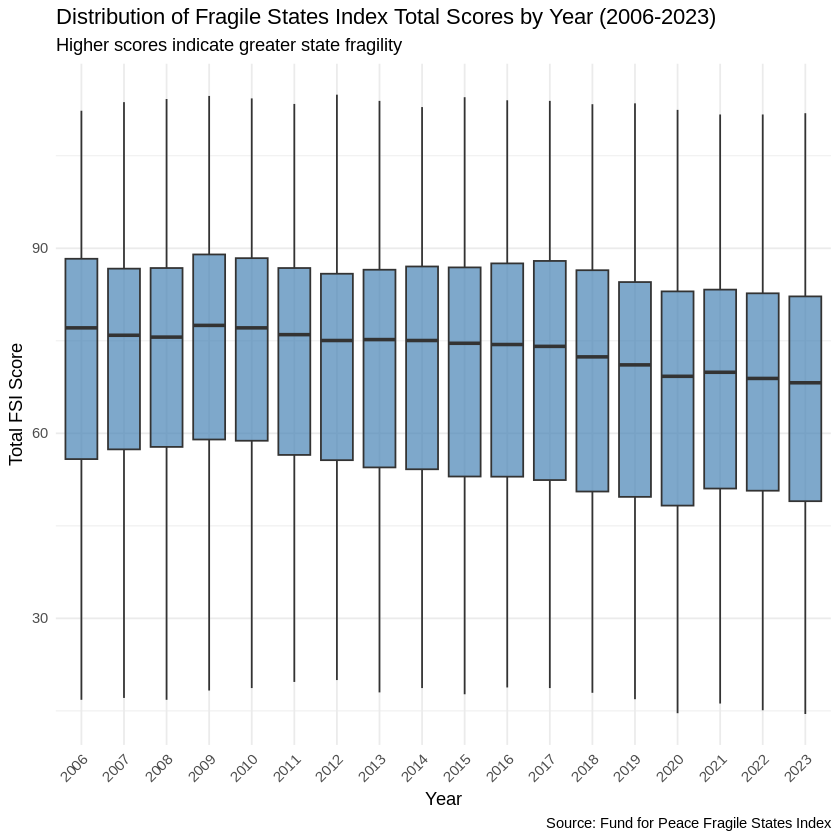

In [21]:
# Create boxplot of Total FSI scores by Year
# Higher scores indicate greater state fragility
ggplot(fsi_select, aes(x = factor(Year), y = Total)) + geom_boxplot(fill = "steelblue", alpha = 0.7) + labs(title = "Distribution of Fragile States Index Total Scores by Year (2006-2023)", subtitle = "Higher scores indicate greater state fragility", x = "Year", y = "Total FSI Score", caption = "Source: Fund for Peace Fragile States Index") + theme_minimal() + theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Step 12: Filter Data for 2013 and 2023

In [22]:
# Subset data to only include years 2013 and 2023 for comparison
fsi_compare <- fsi_select %>% filter(Year %in% c(2013, 2023))

In [23]:
# Select only Country, Year, and the three cohesion indicators (C1, C2, C3)
fsi_cohesion <- fsi_compare %>% select(Country, Year, C1_Security_Apparatus, C2_Factionalized_Elites, C3_Group_Grievance)

## Step 13: Reshape to Long Format for Faceting

In [24]:
# Pivot cohesion indicators from wide to long format
# This allows faceted plotting by indicator
fsi_long <- fsi_cohesion %>% pivot_longer(cols = c(C1_Security_Apparatus, C2_Factionalized_Elites, C3_Group_Grievance), names_to = "Indicator", values_to = "Score")

In [25]:
# Verify reshaped data structure
head(fsi_long)

Country,Year,Indicator,Score
<chr>,<int>,<chr>,<dbl>
Somalia,2013,C1_Security_Apparatus,9.7
Somalia,2013,C2_Factionalized_Elites,10.0
Somalia,2013,C3_Group_Grievance,9.3
Congo Democratic Republic,2013,C1_Security_Apparatus,10.0
Congo Democratic Republic,2013,C2_Factionalized_Elites,9.5
Congo Democratic Republic,2013,C3_Group_Grievance,9.4


## Step 14: Faceted Histogram of Cohesion Indicators

This faceted histogram compares the distribution of three cohesion indicators between 2013 and 2023: C1 (Security Apparatus), C2 (Factionalized Elites), and C3 (Group Grievance). Each facet shows one indicator with overlapping histograms for both years, allowing us to see how these cohesion factors have shifted over the decade.

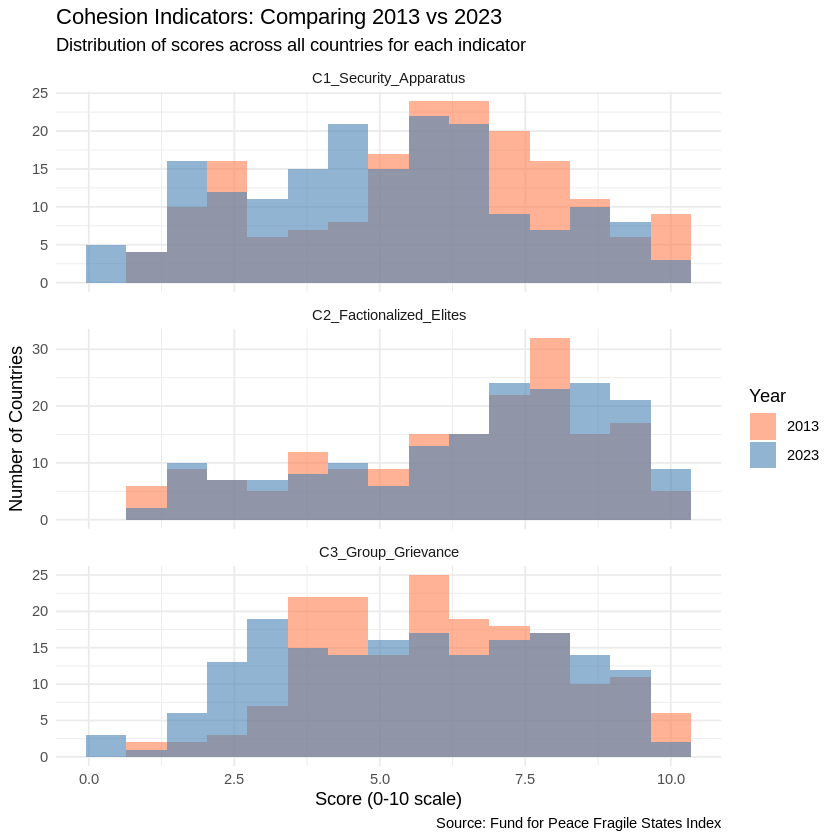

In [26]:
# Create faceted histogram comparing C1, C2, C3 between 2013 and 2023
# Each facet shows one indicator with overlapping histograms by year
ggplot(fsi_long, aes(x = Score, fill = factor(Year))) + geom_histogram(bins = 15, alpha = 0.6, position = "identity") + facet_wrap(~ Indicator, ncol = 1, scales = "free_y") + scale_fill_manual(values = c("2013" = "coral", "2023" = "steelblue"), name = "Year") + labs(title = "Cohesion Indicators: Comparing 2013 vs 2023", subtitle = "Distribution of scores across all countries for each indicator", x = "Score (0-10 scale)", y = "Number of Countries", caption = "Source: Fund for Peace Fragile States Index") + theme_minimal()

## Summary

**Files Read:** 18 FSI Excel files (2006-2023) from GitHub

**Columns Kept:** Country, Year, Rank, Total, C1_Security_Apparatus, C2_Factionalized_Elites, C3_Group_Grievance, E1_Economy, E2_Economic_Inequality, E3_Human_Flight_and_Brain_Drain, P1_State_Legitimacy, P2_Public_Services, P3_Human_Rights, S1_Demographic_Pressures, S2_Refugees_and_IDPs, X1_External_Intervention

**Plots Created:**
1. Boxplot of Total FSI scores by Year (2006-2023)
2. Faceted histograms comparing C1, C2, C3 between 2013 and 2023

In [27]:
# Display final column names to confirm they match requirements
names(fsi_select)

[1] "Country"                         "Year"                           
 [3] "Rank"                            "Total"                          
 [5] "C1_Security_Apparatus"           "C2_Factionalized_Elites"        
 [7] "C3_Group_Grievance"              "E1_Economy"                     
 [9] "E2_Economic_Inequality"          "E3_Human_Flight_and_Brain_Drain"
[11] "P1_State_Legitimacy"             "P2_Public_Services"             
[13] "P3_Human_Rights"                 "S1_Demographic_Pressures"       
[15] "S2_Refugees_and_IDPs"            "X1_External_Intervention"